# <center><h1> Market Positioning Of mobile</h1></center>

**Note: KNN makes prediction based on similarty of data points**

## Problem Statement

There is a new mobile company and the CEO wants to give tough fight to big companies like Apple,Samsung etc.

He has no idea of how to estimate price of mobiles his company creates. A simple assumption of the prices will not be profitable in this competitive world. To solve this problem he collects sales data of mobile phones of various companies.

Thus, the CEO has hired you to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price.
You have to predict a price range indicating how high the price is.

## Data Definition

**battery_power:** Total energy a battery can store in one time measured in mAh<br> 

**clock_speed:** Speed at which microprocessor executes instructions<br>

**fc:** Front Camera mega pixels<br>

**int_memory:** Internal Memory in Gigabytes<br>

**m_dep:** Mobile Depth in cm<br>

**mobile_wt:** Weight of mobile phone<br>

**n_cores:** Number of cores of processor<br>

**pc:** Primary Camera mega pixels<br>

**px_height:** Pixel Resolution Height<br>

**px_width:** Pixel Resolution Width<br>

**ram:** Random Access Memory in Mega Bytes<br>

**sc_h:** Screen Height of mobile in cm<br>

**sc_w:** Screen Width of mobile in cm<br>

**talk_time:** longest time that a single battery charge will last when you are<br>

**price_range:** This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

## Table of Content

Import Libraries

Set Options

Read Data

Data Analysis and Preparation

4.1 - Understand the Dataset
4.1.1 - Data Type
4.1.2 - Summary Statistics
4.1.3 - Distribution of Variables
4.1.4 - Correlation
4.1.5 - Discover Outliers
4.1.6 - Missing Values
4.2 - Prepare the Data

KNN

## Import Library

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,cohen_kappa_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import warnings 
warnings.filterwarnings("ignore")

In [68]:
plt.rcParams["figure.figsize"]=[15,8]

## Set Options

In [69]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
np.set_printoptions(suppress = True)

## Read Data

In [70]:
import os
os.chdir(r"D:\Imarticus\ML\Supervised learning\7-KNN")

In [71]:
df_mobile = pd.read_csv(r"Mobile_data.csv")
df_mobile.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


## Data Analysis and Preparation`
	
Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and prepare data to perform classification techniques:
1. Check data types. Ensure your data types are correct. Refer data definitions to validate
2. If data types are not as per business definition, change the data types as per requirement
3. Study summary statistics
4. Distribution of variables
5. Study correlation
6. Detect outliers
7. Check for missing values

Note: It is an art to explore data, and one needs more and more practice to gain expertise in this area

In [72]:
df_mobile.shape

(2000, 15)

In [73]:
df_mobile.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

In [74]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [75]:
df_features = df_mobile.iloc[:,df_mobile.columns != "price_range"]
df_target = df_mobile.iloc[:,df_mobile.columns == "price_range"]

In [76]:
df_features.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


## Distribution of varibles

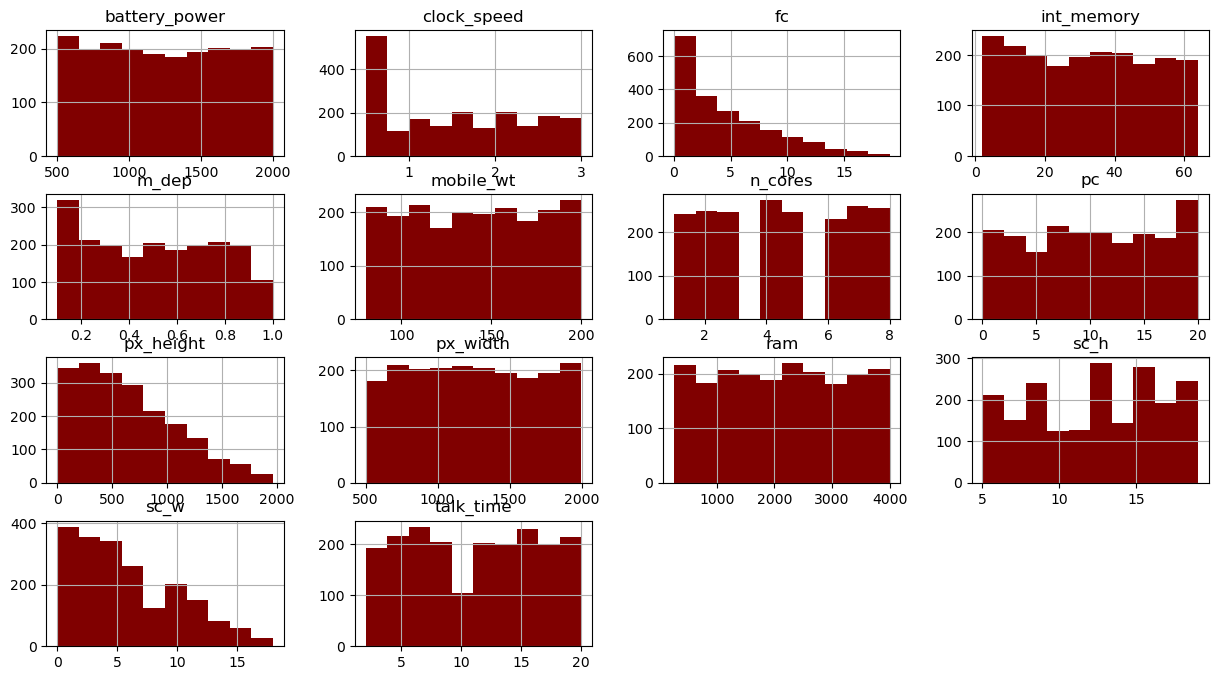

In [77]:
df_features.hist(color = "maroon")
plt.tight_layout
plt.show()


In [78]:
df_target_frequancy = df_target.price_range.value_counts()
df_target_frequancy

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

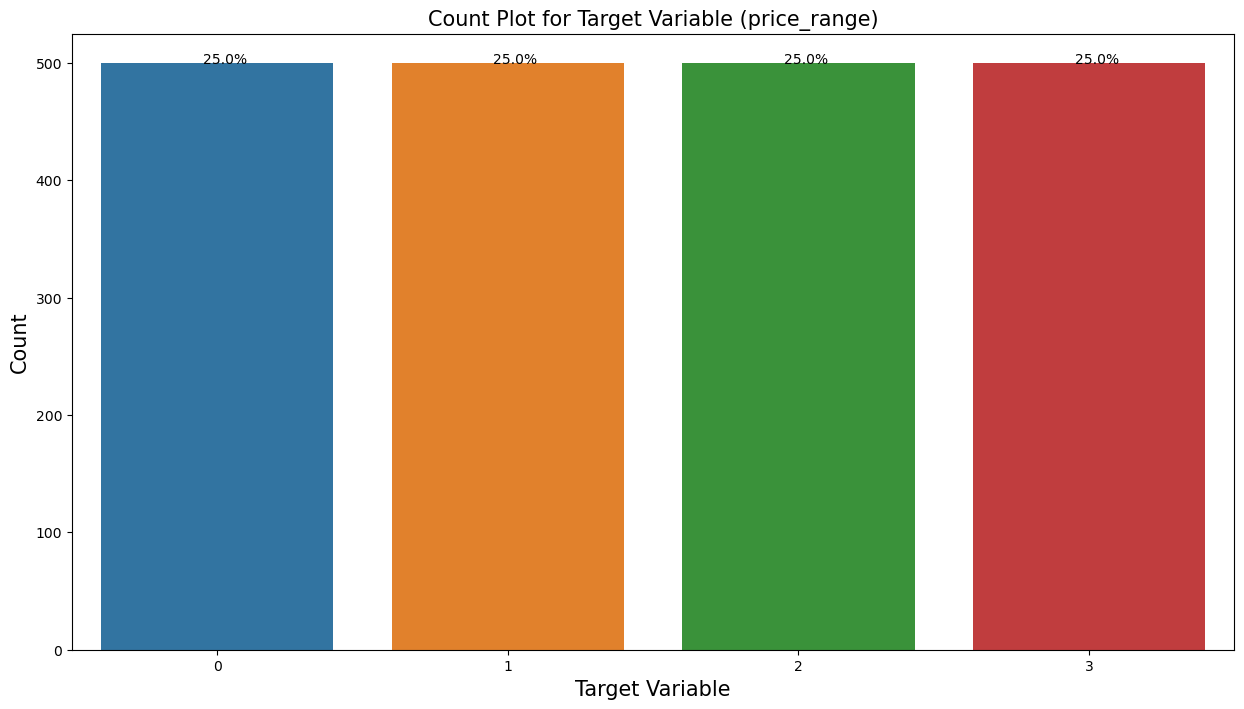

In [79]:
sns.countplot(x = df_target.price_range)
plt.text(x = -0.05, y = df_target.price_range.value_counts()[0],s = str((df_target_frequancy[0])*100/len(df_target.price_range)) + '%')
plt.text(x = 0.95, y = df_target.price_range.value_counts()[1], s = str((df_target_frequancy[1])*100/len(df_target.price_range)) + '%')
plt.text(x = 1.95, y = df_target.price_range.value_counts()[2], s = str((df_target_frequancy[2])*100/len(df_target.price_range)) + '%')
plt.text(x = 2.95, y = df_target.price_range.value_counts()[3], s = str((df_target_frequancy[3])*100/len(df_target.price_range)) + '%')

plt.title('Count Plot for Target Variable (price_range)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

In [80]:
price_group = df_mobile.groupby("price_range")

In [81]:
price_group["ram"].mean()

price_range
0     785.314
1    1679.490
2    2582.816
3    3449.232
Name: ram, dtype: float64

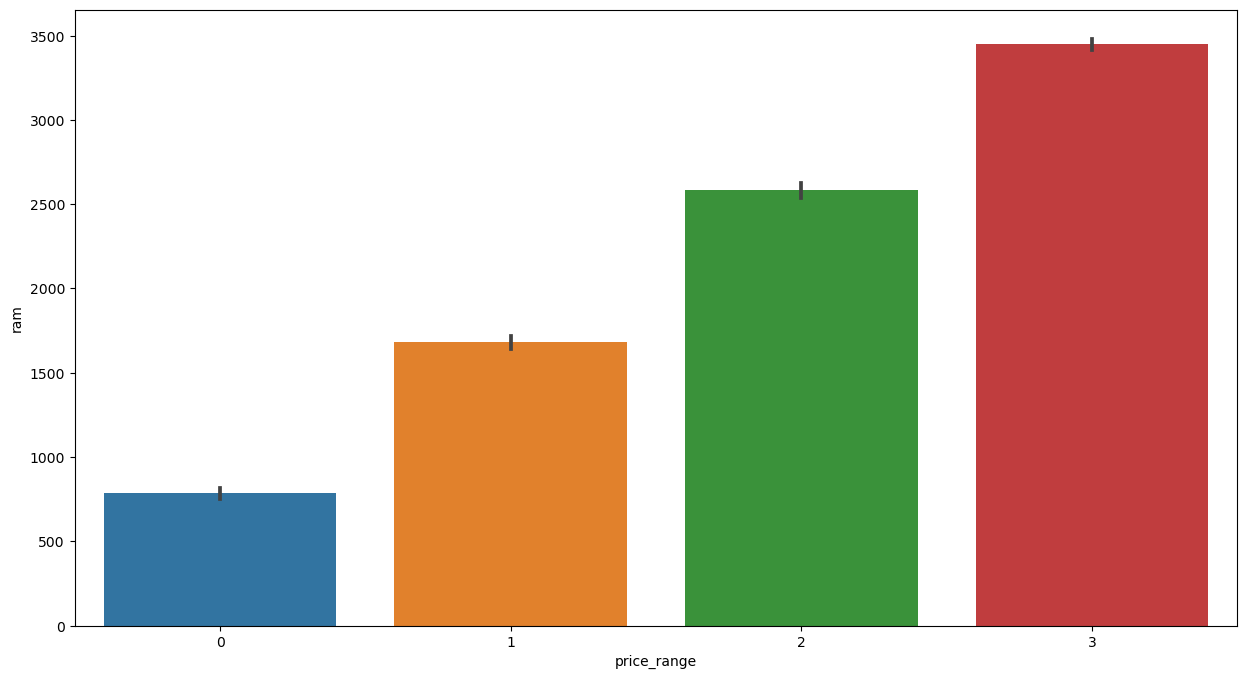

In [82]:
sns.barplot(x = "price_range", y = "ram", data = df_mobile)
plt.show()

In [83]:
price_group["battery_power"].mean()

price_range
0    1116.902
1    1228.868
2    1228.320
3    1379.984
Name: battery_power, dtype: float64

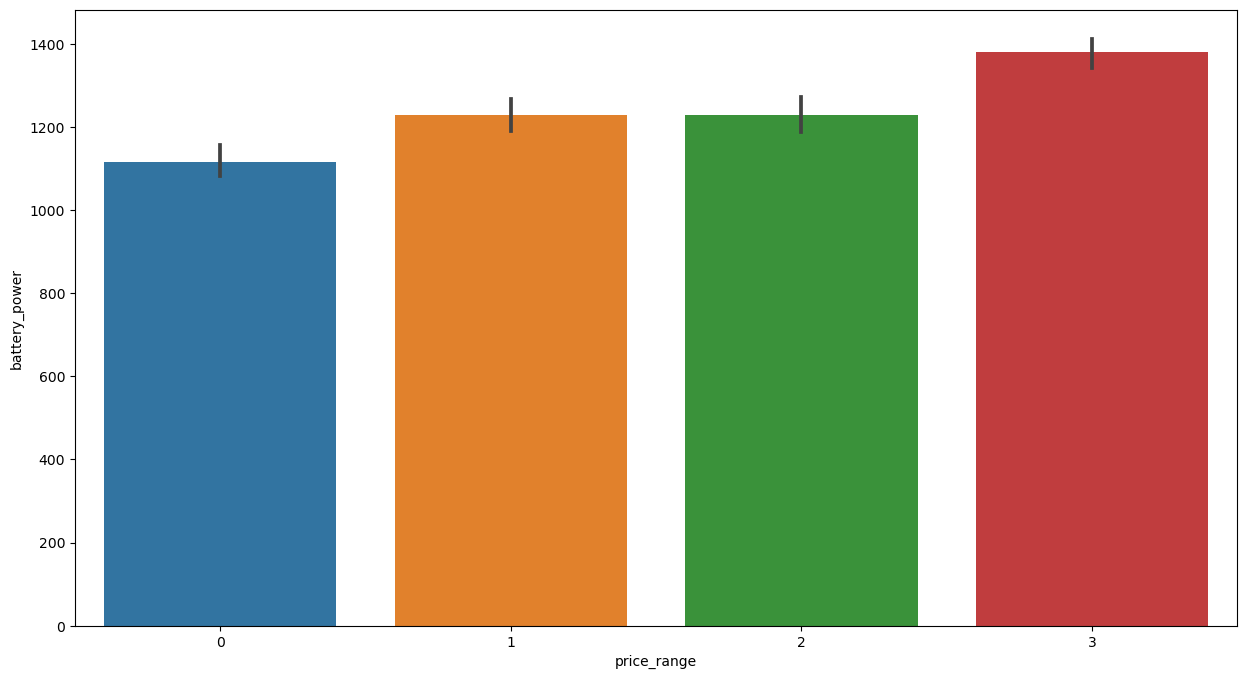

In [84]:
sns.barplot(x = "price_range", y =  "battery_power", data =df_mobile)
plt.show()

## Correlation

In [85]:
corrmat = df_features.corr()
corrmat

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209
n_cores,-0.029727,-0.005724,-0.013356,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720


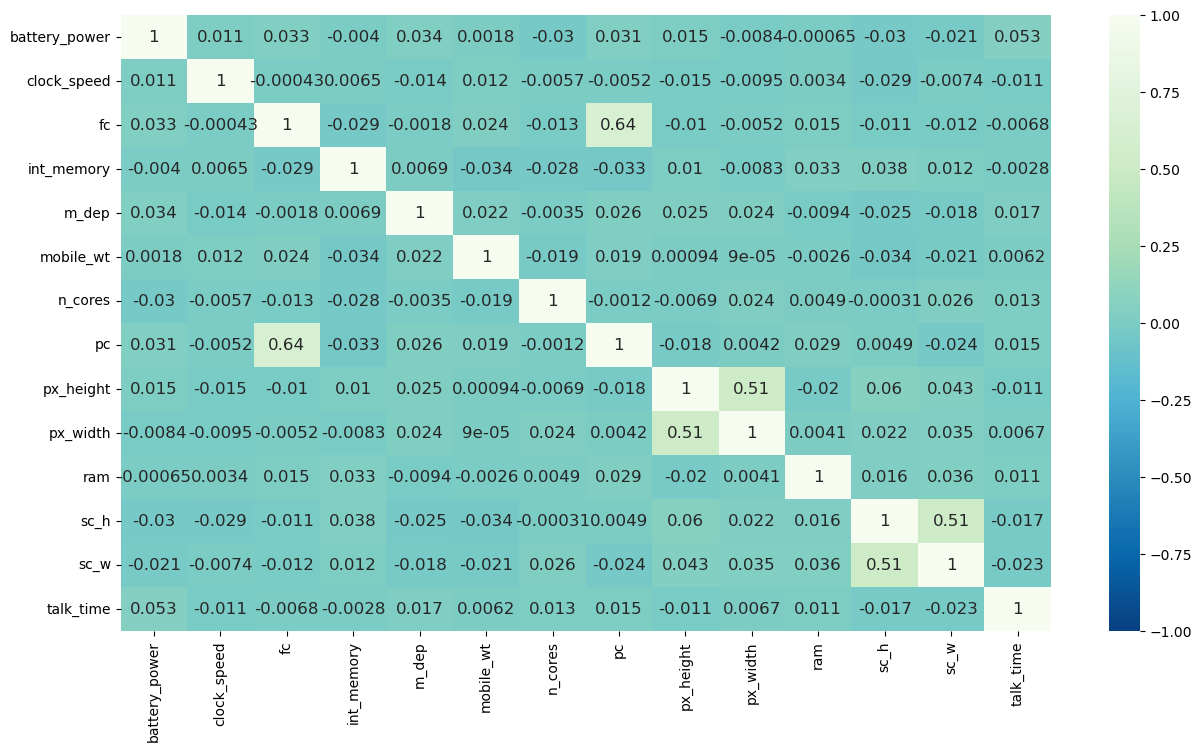

In [86]:
sns.heatmap(corrmat, cmap = "GnBu_r", vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size":12 })
plt.show()

#### <center>There i no high correlation so no need to do Feature Engineering</center>

## Discover the Outlier

To detect outliers in numeric data, we perform the following:

1. Plot the boxplot for numeric data
2. Note the variables in which outliers are present
3. Remove outliers by IQR method
4. Plot the boxplot to recheck for outliers

<AxesSubplot:xlabel='price_range'>

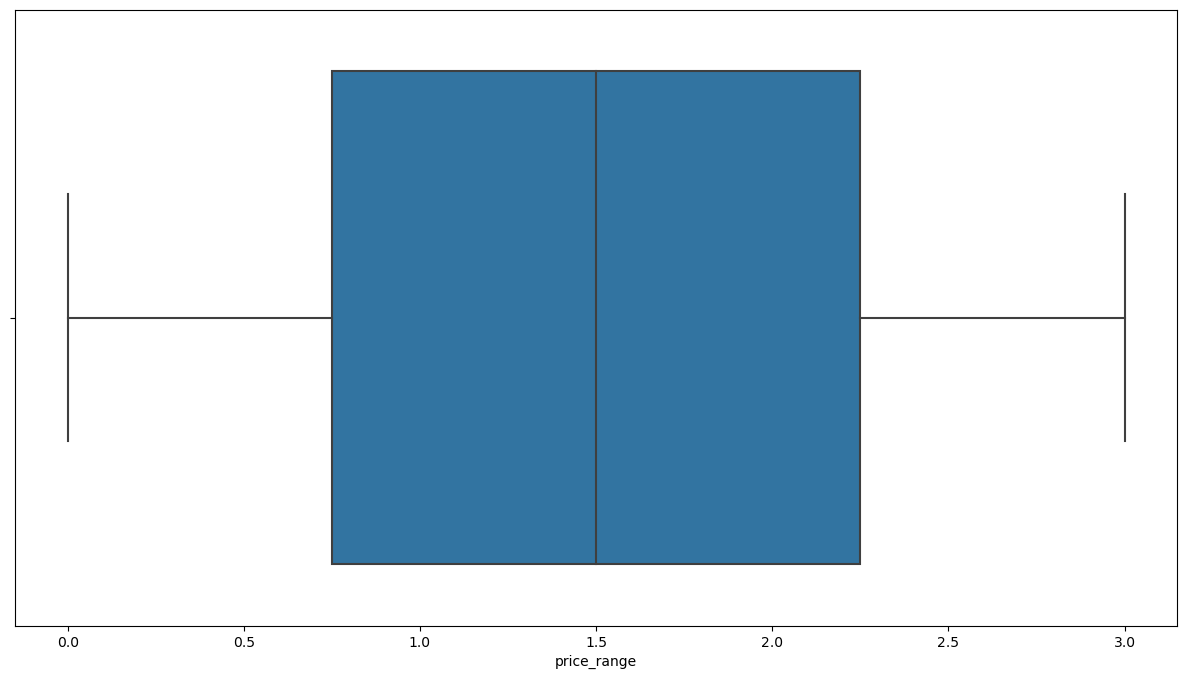

In [87]:
sns.boxplot(df_target.price_range)

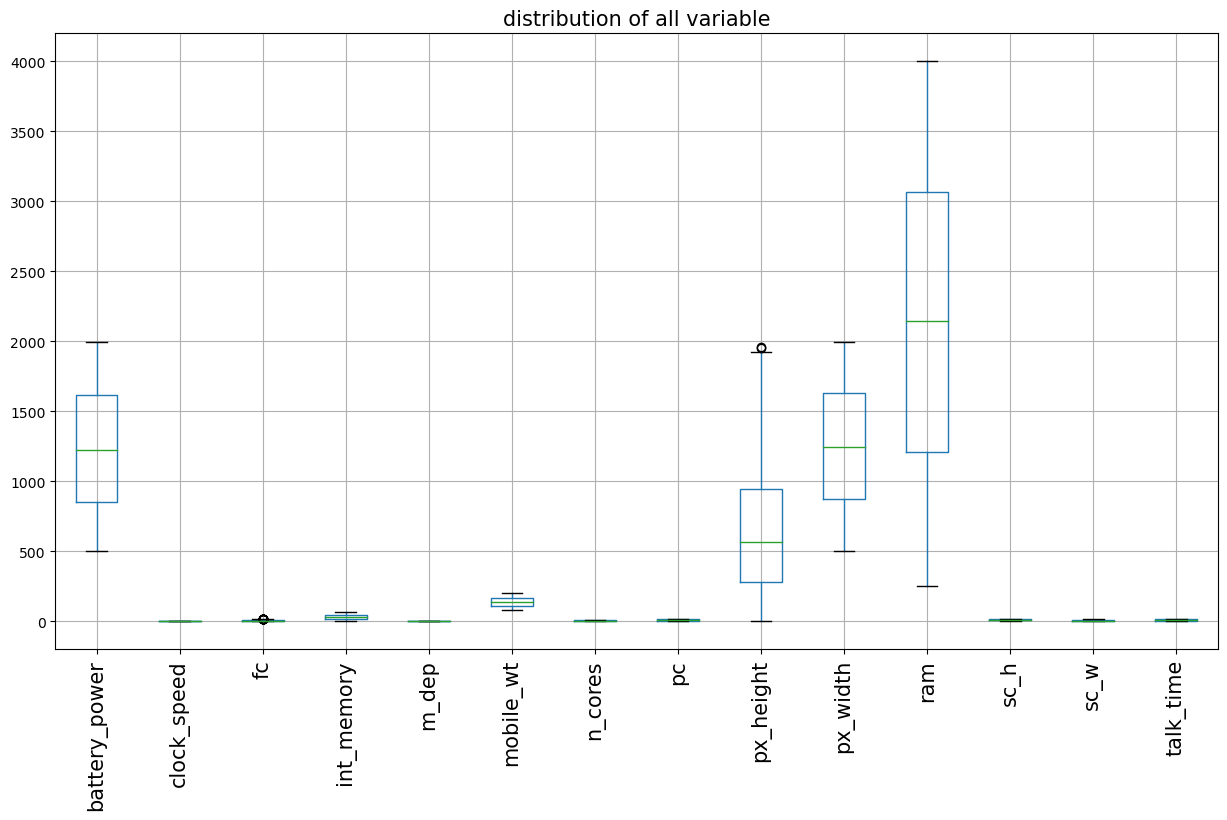

In [88]:
df_features.boxplot()
plt.title("distribution of all variable", fontsize = 15)
plt.xticks( rotation = "vertical", fontsize= 15)
plt.show()

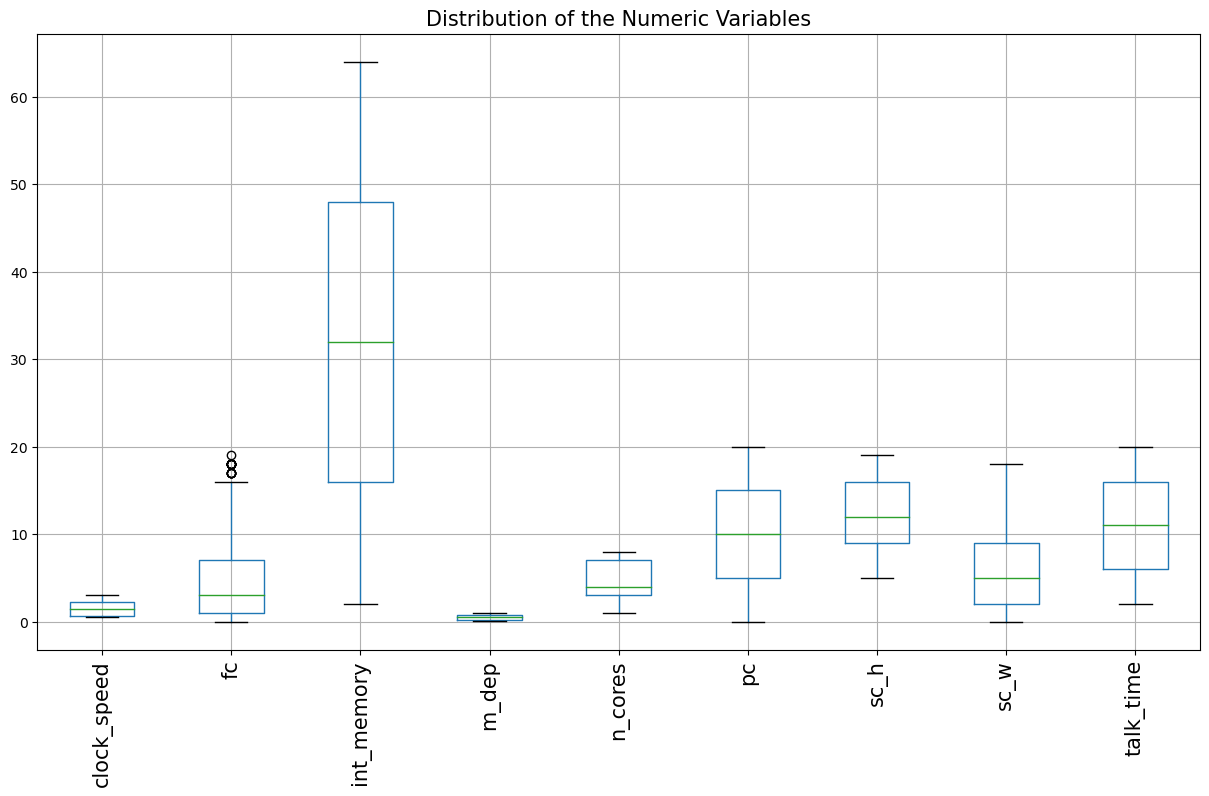

In [89]:
# plot a boxplot to visualize the outliers in all the numeric variables
df_features.drop(['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram'], axis = 1).boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of the Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

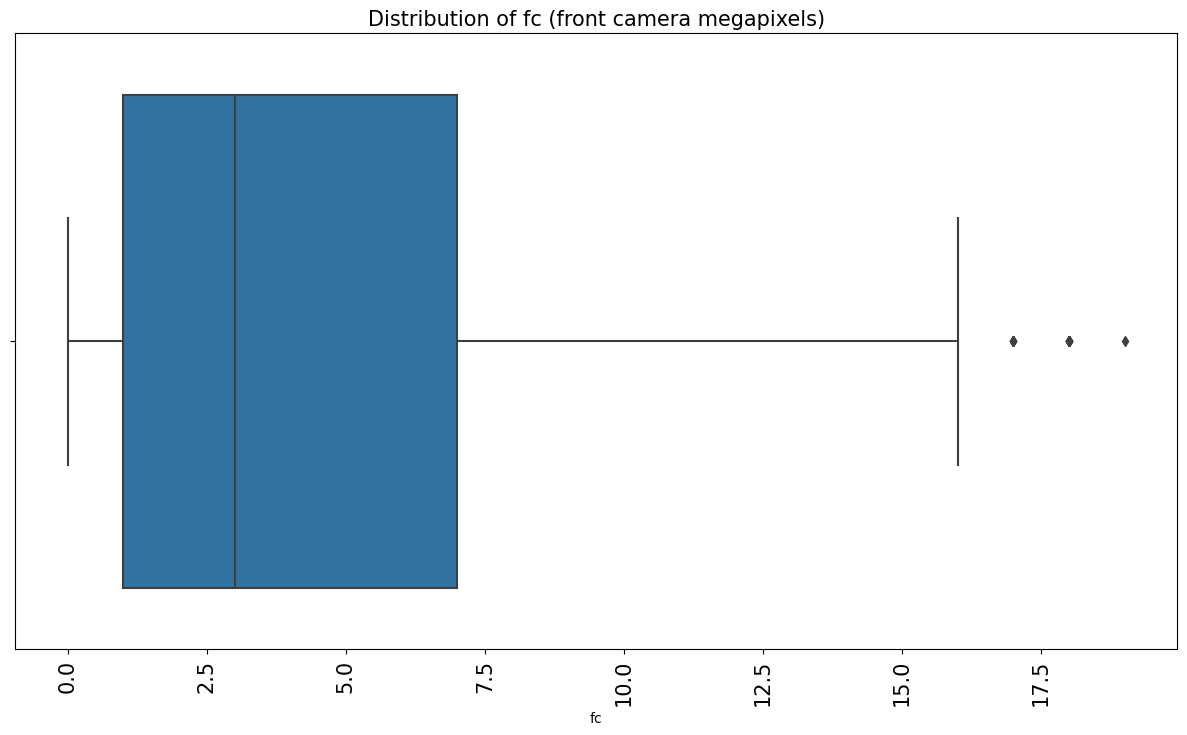

In [90]:
sns.boxplot(df_features["fc"])
plt.title('Distribution of fc (front camera megapixels)', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

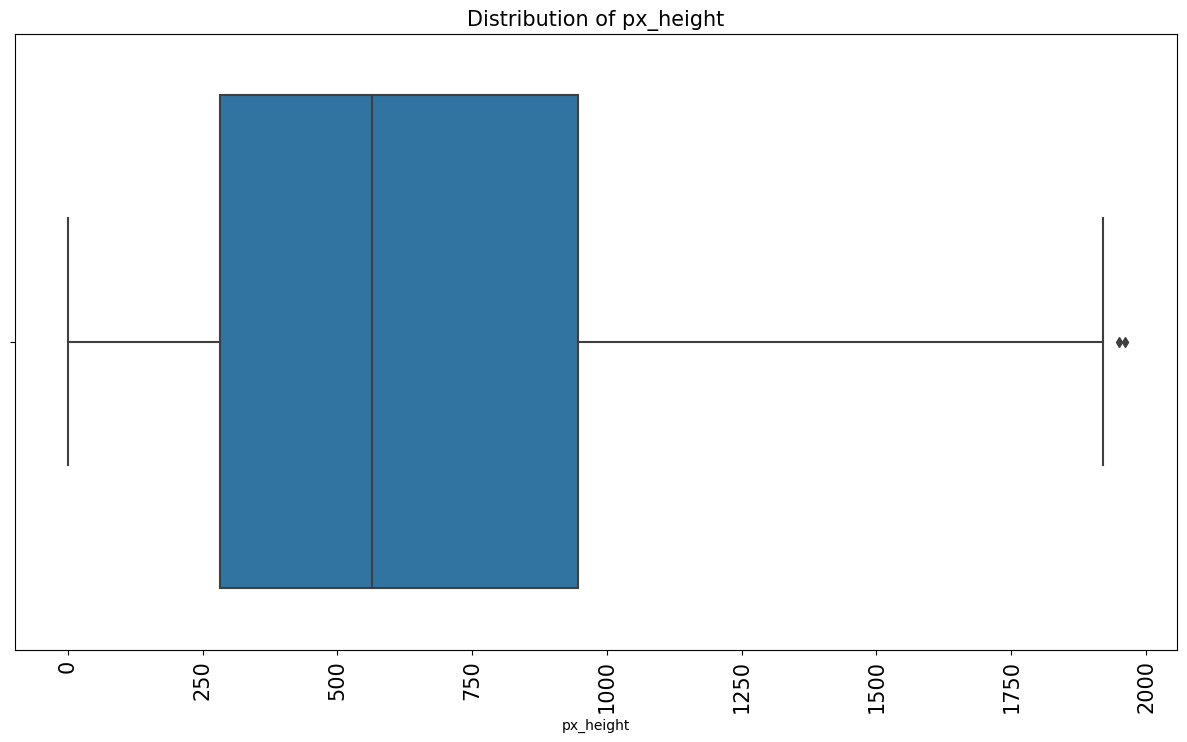

In [91]:
sns.boxplot(df_features["px_height"])
plt.title('Distribution of px_height', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

## Remove outliers

In [92]:
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3-Q1
print(IQR)

battery_power     763.50
clock_speed         1.50
fc                  6.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
pc                 10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
dtype: float64


In [93]:
# '~' returns the values that do not satisfy the given conditions 

df_mobile = df_mobile[~((df_mobile < (Q1 - 1.5 * IQR)) | (df_mobile > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the index of the dataframe without outliers
df_mobile = df_mobile.reset_index(drop = True)

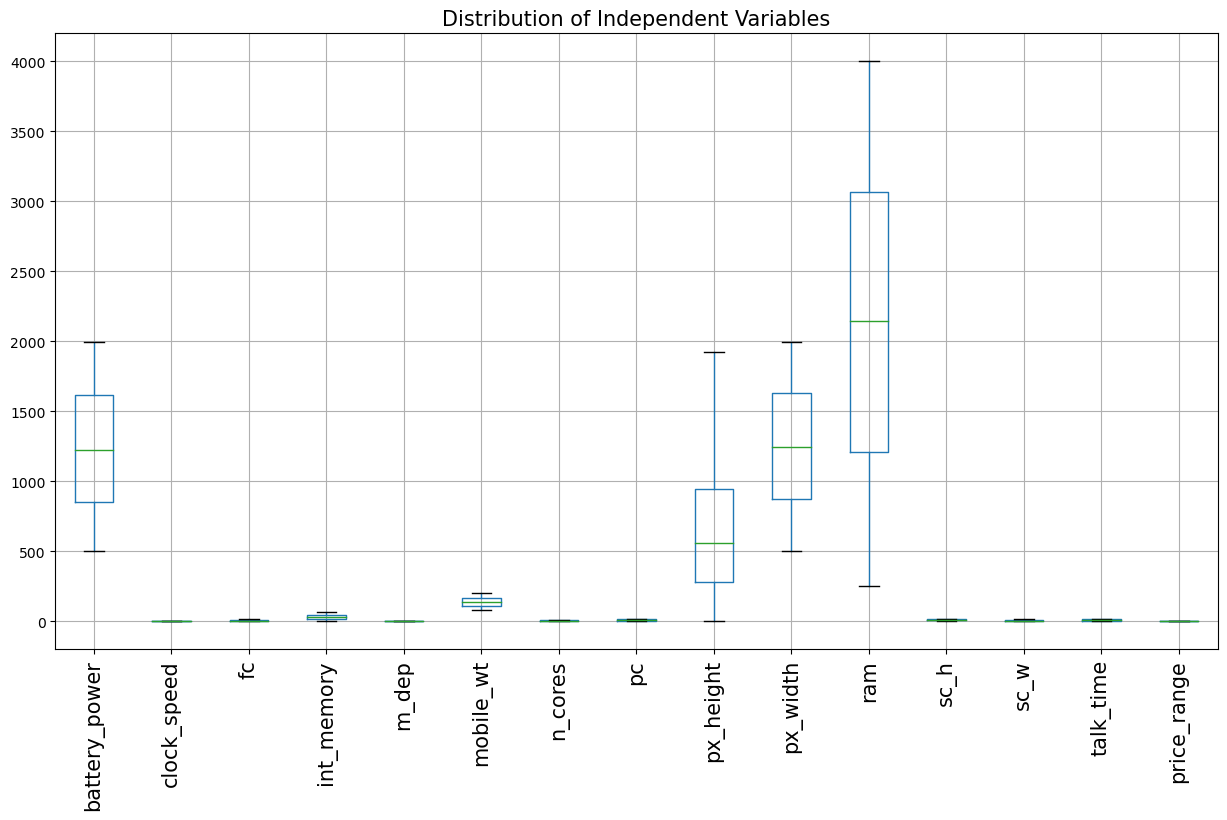

In [94]:
# To confirm that the outliers have been removed; let us visualize the boxplot again.
df_mobile.boxplot()
plt.title('Distribution of Independent Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

In [95]:
df_mobile.shape

(1980, 15)

In [96]:
Total = df_mobile.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_mobile.isnull().sum()*100/df_mobile.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
battery_power,0,0.0
clock_speed,0,0.0
fc,0,0.0
int_memory,0,0.0
m_dep,0,0.0
mobile_wt,0,0.0
n_cores,0,0.0
pc,0,0.0
px_height,0,0.0
px_width,0,0.0


In [97]:
y = df_mobile.price_range
df_mobile = df_mobile.drop("price_range", axis = 1)

## Standardise the data

In [98]:
scaler = MinMaxScaler()
scaler.fit(df_mobile)

MinMaxScaler()

In [99]:
X = scaler.fit_transform(df_mobile)

## Create MAtrix for Evaluating 

In [100]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

In [101]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # predict the target values using X_test
    y_pred = model.predict(X_test)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1', 'Predicted:2',
                                                    'Predicted:3'],\
                               index = ['Actual:0','Actual:1', 'Actual:2','Actual:3'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']),
                cbar = False, linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

# Model Building Knn

## Spliting the data

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = 0.30, random_state = 10)
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (1386, 14)
y_train (1386,)
X_test (594, 14)
y_test (594,)


In [103]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

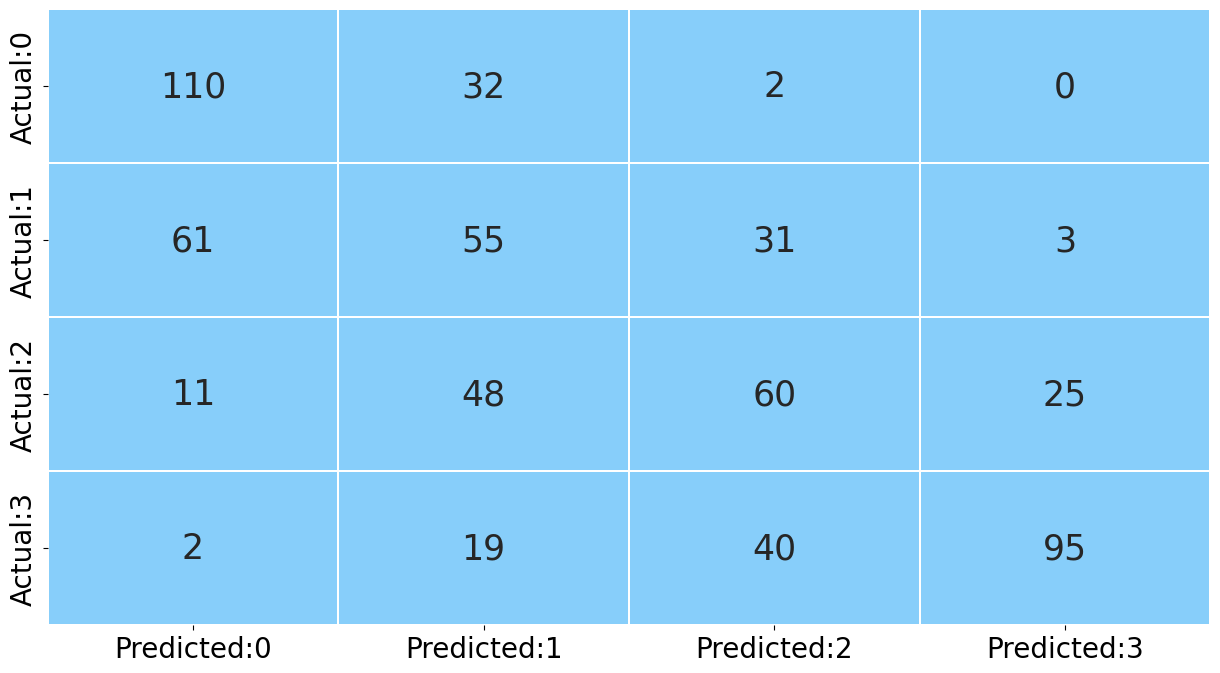

In [106]:
plot_confusion_matrix(knn_model)

In [107]:
test_report = get_test_report(knn_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.60      0.76      0.67       144
           1       0.36      0.37      0.36       150
           2       0.45      0.42      0.43       144
           3       0.77      0.61      0.68       156

    accuracy                           0.54       594
   macro avg       0.54      0.54      0.54       594
weighted avg       0.55      0.54      0.54       594



## Optimal value of k  using GridSearchCV

In [108]:
# create a dictionary with hyperparameters and its values
# n_neighnors: number of neighbors to consider
# usually, we consider the odd value of 'n_neighnors' to avoid the equal number of nearest points with more than one class
# pass the different distance metrics to the parameter, 'metric'
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 17} 



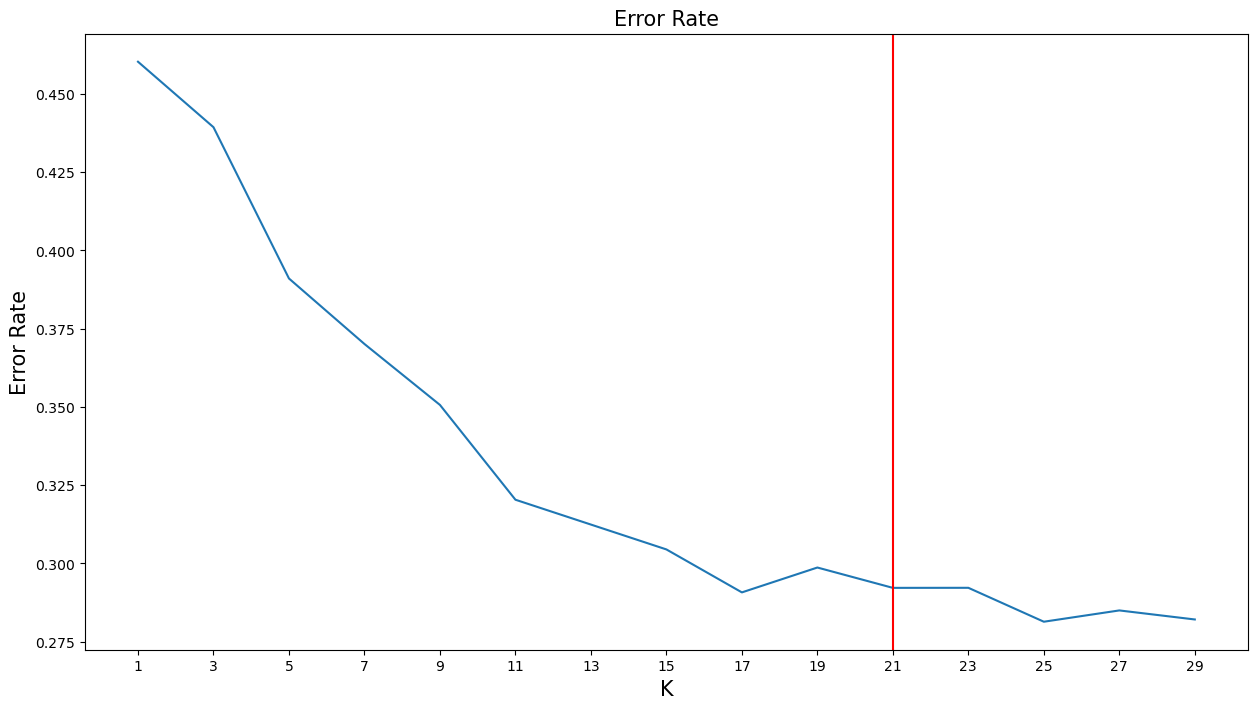

In [109]:
# consider an empty list to store error rate
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,30,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'manhattan')
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, X_train, y_train, cv = 5)
      
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,30,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 30, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 21, color = 'red')

# display the plot
plt.show()

In [110]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the knn model using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(knn_grid))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       144
           1       0.62      0.56      0.59       150
           2       0.60      0.68      0.64       144
           3       0.87      0.73      0.79       156

    accuracy                           0.71       594
   macro avg       0.71      0.71      0.71       594
weighted avg       0.71      0.71      0.71       594



In [111]:
y_pred = knn_model.predict(X_test)

In [112]:
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.38559456398641


In [113]:
y_pred = knn_grid.predict(X_test)

In [114]:
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.6098566348832469


#### Interpretation: As, the kappa score for the tuned KNN model is 0.6121, we can say that there is substantial agreement between the actual and predicted values. The tuned knn model with k=21 is better than the knn model with k=3.